## SUPPORT VECTOR MACHINES

In [48]:
from sklearn.datasets import make_classification #it will give some overlap wala dataset not like makeblob

In [49]:
X, Y = make_classification(
n_samples=400,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=3,
)

In [50]:
print(X.shape)
print(Y.shape)

(400, 2)
(400,)


In [51]:
Y[Y==0] = -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

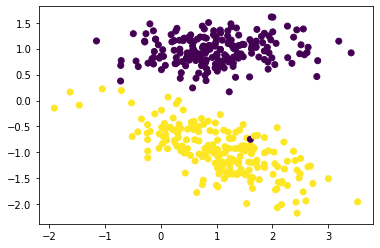

In [52]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [53]:
import numpy as np

In [54]:
class SVM:
    def __init__(self,C=1.0): #agar koi outlyer boundary cross krta hai toh uspr kitni penalty lagani hai vo C batata hai
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        
        loss += 0.5*np.dot(W.T,W)[0][0]
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(X[i].reshape(1,-1),W)+b)
            ti = ti[0]
            loss += self.C*max(0,(1-ti))
            
        return loss
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=200):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        W = np.zeros((no_of_features,1))
        bias = 0.0
        
        losses = []
        
        for i in range(maxItr):
            
            l = self.hingeLoss(W,bias,X,Y) #calc loss
            losses.append(l)
            
            #Mini batch
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                #Gradient wrt weight(w) and bias(b)
                gradw = 0
                gradb = 0
                
                #summation over batch gradient
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        idx = idx[j]
                        ti = Y[idx]*(np.dot(X[idx].reshape(1,-1),W)+bias)[0]
                        
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[idx]*X[idx].reshape(1,-1).T
                            gradb += c*Y[idx]
                            
                #Gradient weight update
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                    
            self.W = W
            self.b = bias
            return W,bias,losses
                

In [55]:
mySVM = SVM()

In [56]:
W = np.zeros((2,1))
print(np.dot(W.T,W))

print(X[9].shape)

[[0.]]
(2,)


In [57]:
W,b,Losses = mySVM.fit(X,Y,maxItr=100,batch_size=400)

UnboundLocalError: local variable 'idx' referenced before assignment

In [43]:
plt.plot(Losses)

NameError: name 'Losses' is not defined

In [ ]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(20,20))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2
    
    positive_plane = -(w1*x_1 + b +1)/w2
    negative_plane = -(w1*x_1+b-1)/w2
    
    plt.plot(x_1,x_2,label="HyperPlane")
    plt.plot(x_1,positive_plane,label="Positive plane")
    plt.plot(x_1,negative_plane,label="Negative plane")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)